In [61]:
import pandas as pd
import numpy as np
from textblob import TextBlob

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krishna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [62]:
data = pd.read_csv(r'C:\Users\Krishna\Machine Learning\Women Clothing Review\Womens Clothing E-Commerce Reviews.csv', na_values=['NA'])

In [63]:
data

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [64]:
text_data = data[['Review Text', 'Recommended IND']]

In [65]:
text_data = text_data.dropna()

In [66]:
train, test = train_test_split(text_data,test_size = 0.1)

In [67]:
train_pos = train[ train['Recommended IND'] == 1]
train_pos = train_pos['Review Text']
train_neg = train[ train['Recommended IND'] == 0]
train_neg = train_neg['Review Text']

In [ ]:
train_pos.head(5)

Positive words


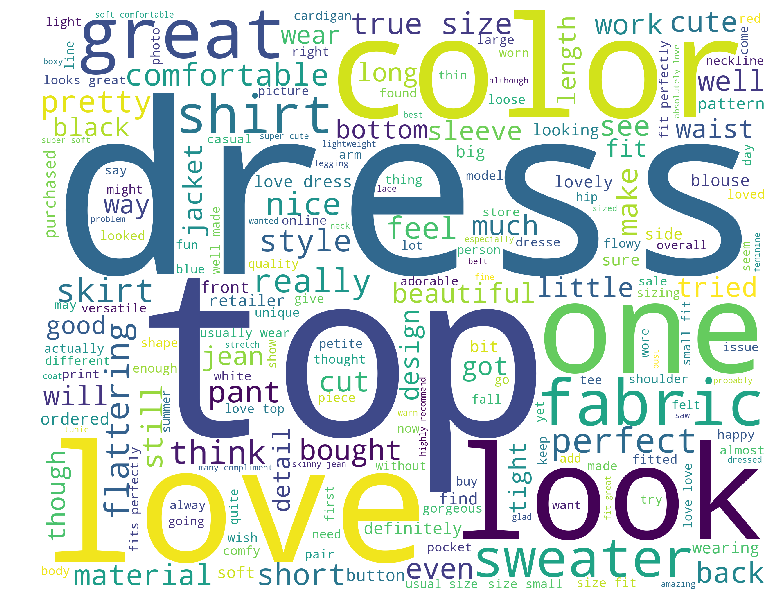

Negative words


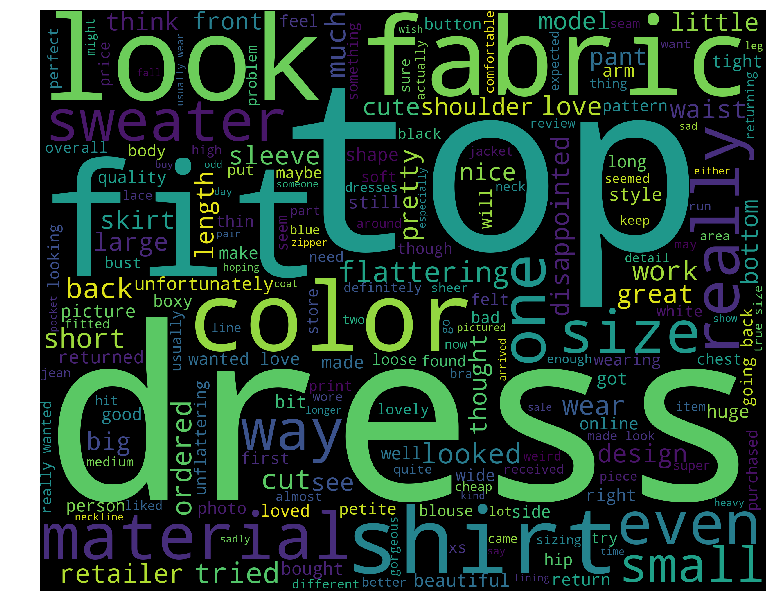

In [69]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [78]:
reviews = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row['Review Text'].split() if len(e) >= 3]
    words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
    reviews.append((words_without_stopwords, row['Recommended IND']))

test_pos = test[ test['Recommended IND'] == 1]
test_pos = test_pos['Review Text']
test_neg = test[ test['Recommended IND'] == 0]
test_neg = test_neg['Review Text']

In [87]:
reviews.size()

AttributeError: 'list' object has no attribute 'size'

In [79]:
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

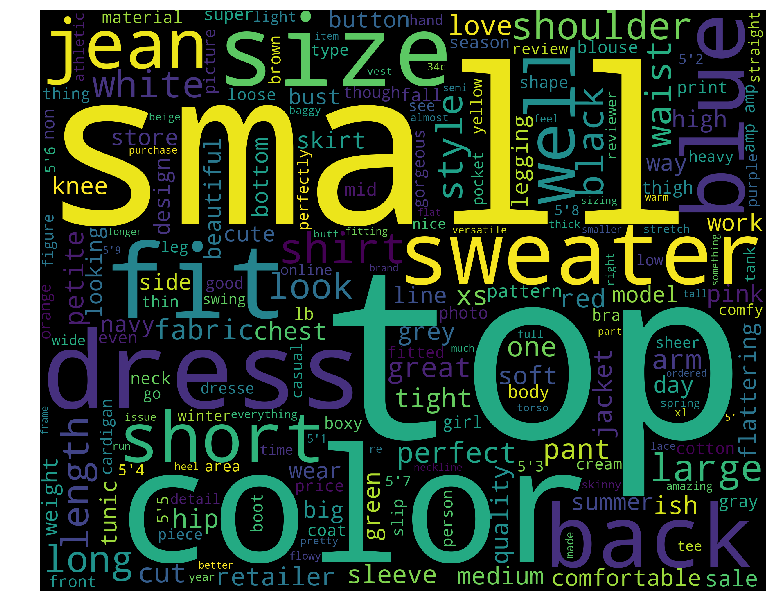

In [80]:
wordcloud_draw(w_features)

In [81]:
words_filtered

['lovely',
 'knit',
 'and',
 'soft,',
 'but',
 'the',
 'bottom',
 'curls',
 'underneath,',
 'similar',
 'the',
 'bell',
 'sleeves.',
 'runs',
 'oversize',
 'too,',
 'got',
 'and',
 "it's",
 'too',
 'bulky',
 'and',
 'unflattering',
 'since',
 'the',
 'bottom',
 "doesn't",
 'lay',
 'flat.',
 'returned!']

In [83]:
words_without_stopwords

['lovely',
 'knit',
 'soft,',
 'bottom',
 'curls',
 'underneath,',
 'similar',
 'bell',
 'sleeves.',
 'runs',
 'oversize',
 'too,',
 'got',
 'bulky',
 'unflattering',
 'since',
 'bottom',
 'lay',
 'flat.',
 'returned!']

In [84]:
training_set = nltk.classify.apply_features(extract_features,reviews)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [85]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))   

[Negative]: 444/250 
[Positive]: 1821/1722 


In [40]:
data.describe()

,ID,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000
